<a href="https://colab.research.google.com/github/MrChrisJr/personality-predictor-ML/blob/main/WGU_Capstone_Christopher_Billings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# No need to install for basic pandas, scikit-learn, numpy in Colab usually
# If you ever get a ModuleNotFoundError, uncomment and run:
# !pip install pandas scikit-learn numpy

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Often used for heatmaps and other statistical plots

📊 Feature Distributions (Histograms):


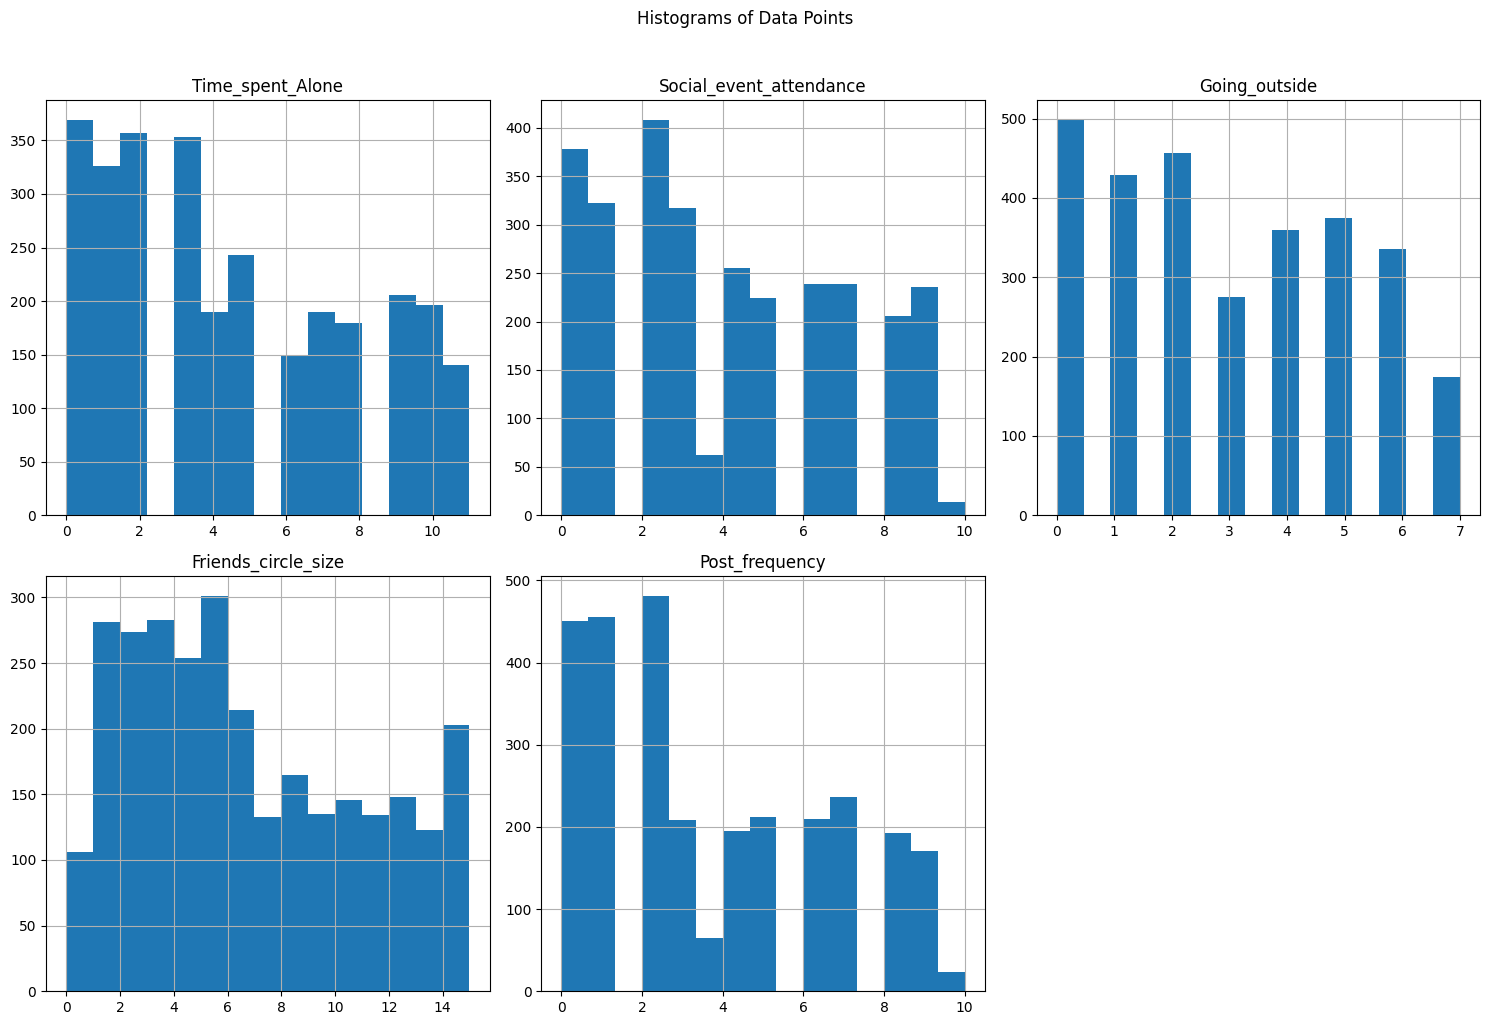

In [ ]:
# --- 1. Load the data ---

import io # Import the io module

# The direct download URL you constructed
google_sheet_url = 'https://drive.google.com/uc?export=download&id=1cqjiZ5-tcS1O_T7gcGuaJudM2yro1TM2'

try:
    # Use requests to get the content of the file
    import requests
    response = requests.get(google_sheet_url)
    response.raise_for_status() # Raise an exception for bad status codes (4xx or 5xx)

    # Use io.StringIO to treat the string content as a file
    # This allows pandas to read it directly
    df = pd.read_csv(io.StringIO(response.text))

except requests.exceptions.RequestException as e:
    print(f"Error fetching data from Google Drive: {e}")
    print("Please ensure the Google Drive link is correct and the file is publicly accessible or shared with 'Anyone with the link'.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# --- 2. Prepare the data ---
X = df.iloc[:, :5]  # Features (first 5 columns)
y = df.iloc[:, 5]   # Classifier (6th column)

# Ensure the classifier column has only two unique values
if y.nunique() != 2:
    print("Error: The classifier column must have exactly two unique values for binary logistic regression.")
    print(f"Found unique values: {y.unique()}")

print("📊 Feature Distributions (Histograms):")
# Plot histograms for each of the 5 data points
df.iloc[:, :5].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Histograms of Data Points', y=1.02) # Title for graph
plt.tight_layout()
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Scatter Plots of Feature Relationships (colored by Classifier):


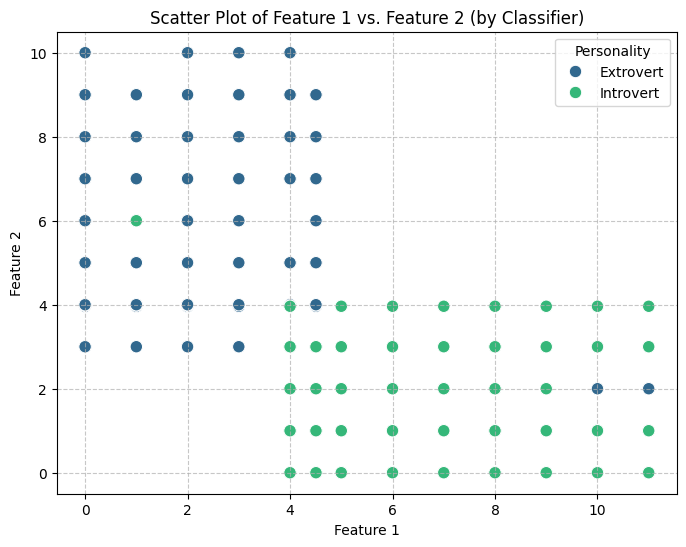

In [ ]:
print("\nScatter Plots of Feature Relationships (colored by Classifier):")
# Example for two features - you can create more combinations
# Replace '0' and '1' with actual column names if you have them, e.g., 'feature1', 'feature2'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=y, palette='viridis', s=80)
plt.title(f'Scatter Plot of Feature 1 vs. Feature 2 (by Classifier)')
plt.xlabel(f'Feature 1')
plt.ylabel(f'Feature 2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# You can add more scatter plots for other feature pairs as needed
# For instance, Feature 0 vs Feature 2:
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 2], hue=y, palette='viridis', s=80)
# plt.title(f'Scatter Plot of Feature 1 vs. Feature 3 (by Classifier)')
# plt.xlabel(f'Feature 1')
# plt.ylabel(f'Feature 3')
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()


🔥 Correlation Heatmap of Features:


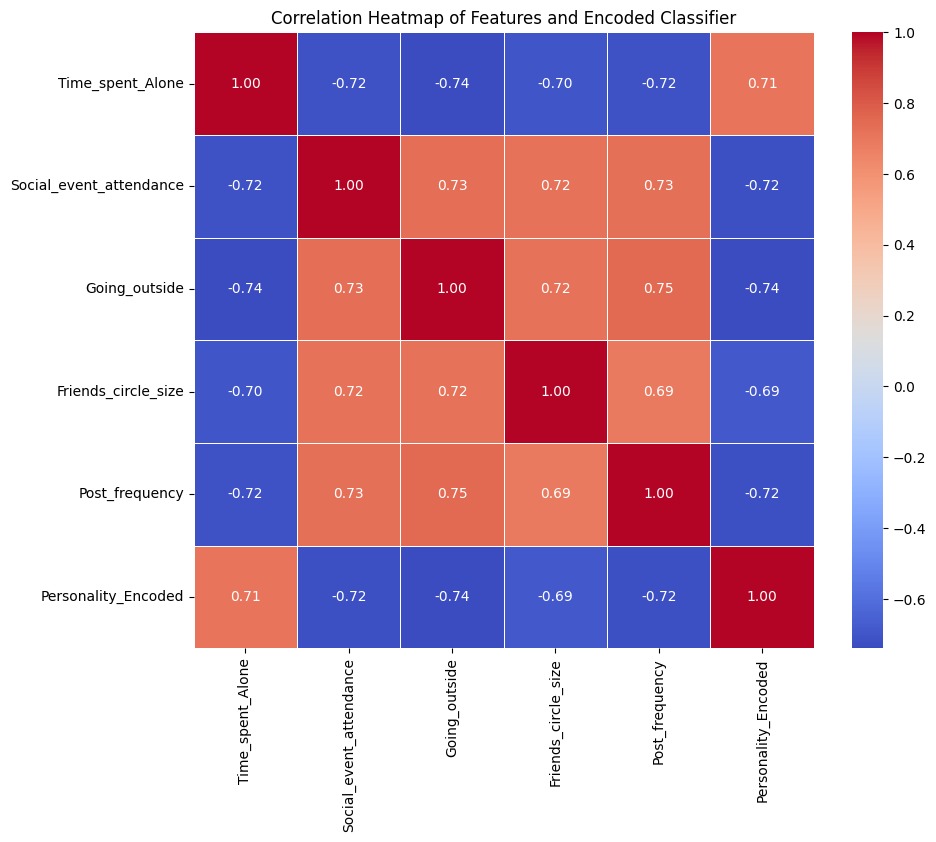

In [ ]:
print("\n🔥 Correlation Heatmap of Features:")
# Combine features and target for correlation calculation
# df_combined = pd.concat([X, y], axis=1) # Original line

# Encode the target variable 'y' to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Combine features and the encoded target for correlation calculation
df_combined = pd.concat([X, pd.Series(y_encoded, name='Personality_Encoded')], axis=1)


# Calculate the correlation matrix
correlation_matrix = df_combined.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features and Encoded Classifier')
plt.show()

📊 Model Evaluation:
Accuracy: 0.93

Confusion Matrix:
[[278  24]
 [ 17 261]]

🌡️ Confusion Matrix Heatmap:


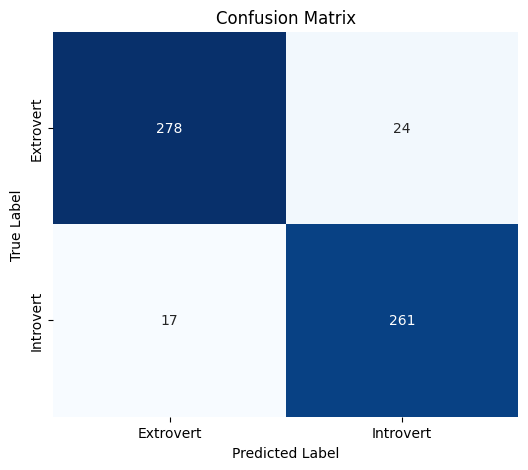


Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.94      0.92      0.93       302
   Introvert       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



In [ ]:
# --- 3. Train the Logistic Regression Model ---
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)

# --- 4. Evaluate the Model ---
print("📊 Model Evaluation:")
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n🌡️ Confusion Matrix Heatmap:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# --- 5. Make Predictions from Console Input ---
print("\n🔮 Make a Prediction:")
while True:
    user_input = []
    for i in range(5):
        while True:
            try:
                # In Colab, input() works interactively
                value = float(input(f"Enter characteristic {i+1}: "))
                user_input.append(value)
                break
            except ValueError:
                print("Invalid input. Please enter a numeric value.")

    # Convert user input to a NumPy array and reshape for single prediction
    user_input_array = np.array(user_input).reshape(1, -1)

    prediction = model.predict(user_input_array)
    prediction_proba = model.predict_proba(user_input_array)

    print(f"\nPredicted Outcome: {prediction[0]}")
    print(f"Prediction Probabilities: {prediction_proba[0]}")

    classes = model.classes_
    for i, cls in enumerate(classes):
        print(f"  Probability of '{cls}': {prediction_proba[0][i]:.4f}")

    another_prediction = input("\nDo you want to make another prediction? (yes/no): ").lower()
    if another_prediction != 'yes':
        break

print("\nThank you for using the Logistic Regression Predictor! 👋")


🔮 Make a Prediction:
Enter characteristic 1: 3
Enter characteristic 2: 3
Enter characteristic 3: 3
Enter characteristic 4: 3
Enter characteristic 5: 3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



Predicted Outcome: Introvert
Prediction Probabilities: [0.47220361 0.52779639]
  Probability of 'Extrovert': 0.4722
  Probability of 'Introvert': 0.5278

Do you want to make another prediction? (yes/no): no

Thank you for using the Logistic Regression Predictor! 👋
